**Project: Wine Quality Prediction using Machine Learning**



**Business Understanding:**


**Consider there is the wine manufacturing company that want to create a new brand of wine and they want to find the quality of each of  the wines.**

**Wine Quality prediction benefits the industry by enhancing consumer confidence, facilitating market segmentation, guiding pricing strategies, promoting consistency, encouraging competition and innovation, educating consumers, aiding international trade, ensuring regulatory compliance, boosting wine tourism, attracting investment, and driving research and development.**


**We are going to build  machine learning models that can take all  chemical values such as fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide ,total sulfur dioxide etc to predict whether the quality of the wine is good or not.**

**Objective:To build a wine quality prediction system using some wine chemical parameters.**

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 


**Importing of the relevant libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**PREPROCESSING AND  EXPLORATORY DATA ANALYSIS**

In [2]:
#loading the dataset 
wine_data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

**EXPLORATORY DATA ANALYSES**

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
wine_data.isnull().sum()
wine_data.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**DATA VISUALISATION**

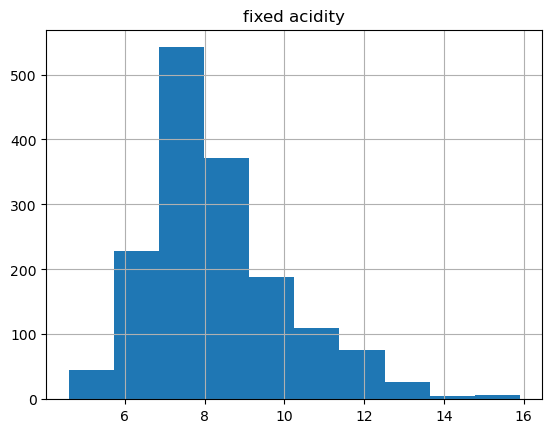

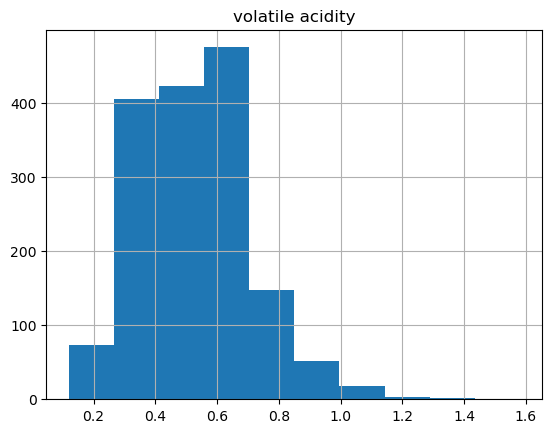

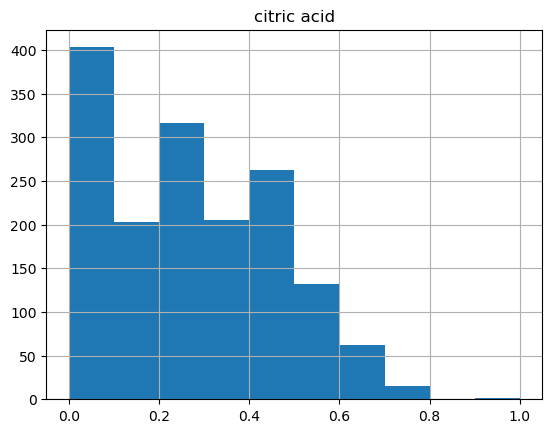

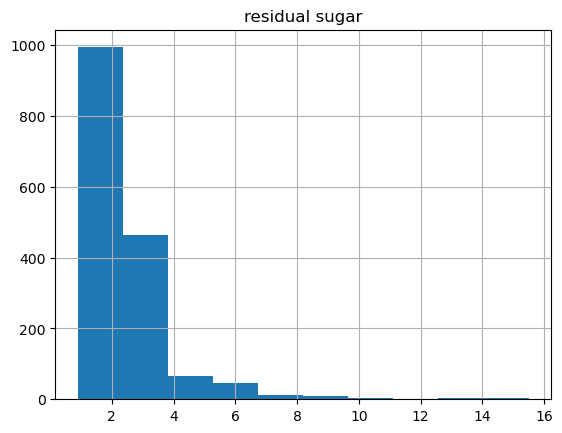

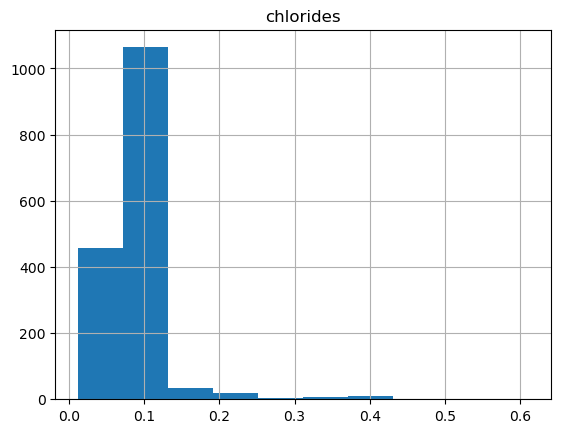

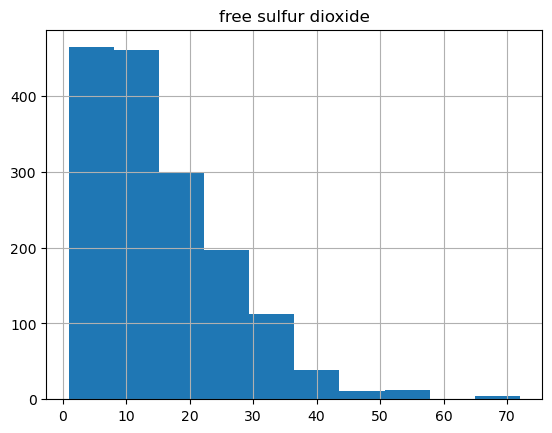

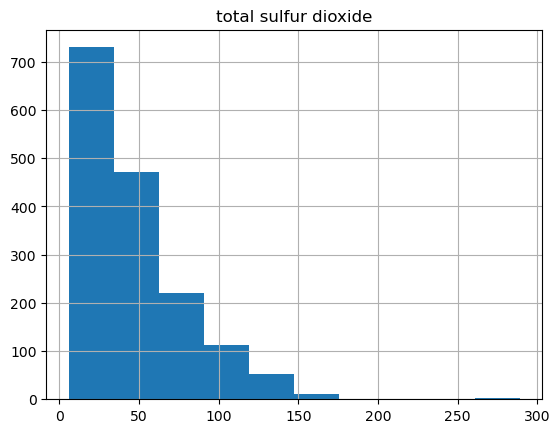

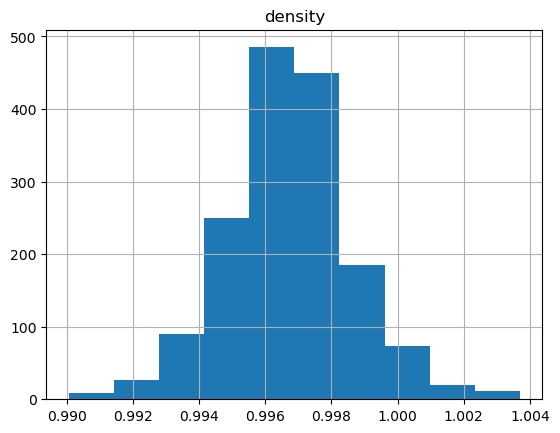

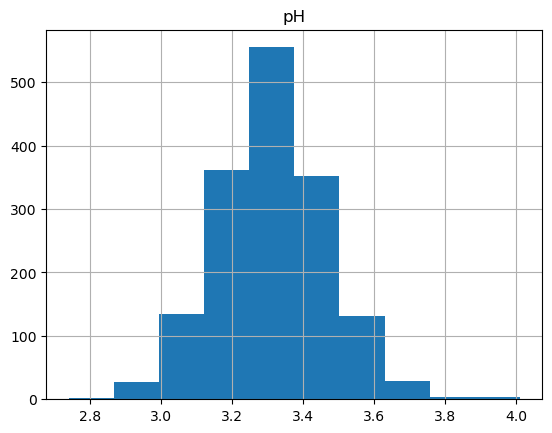

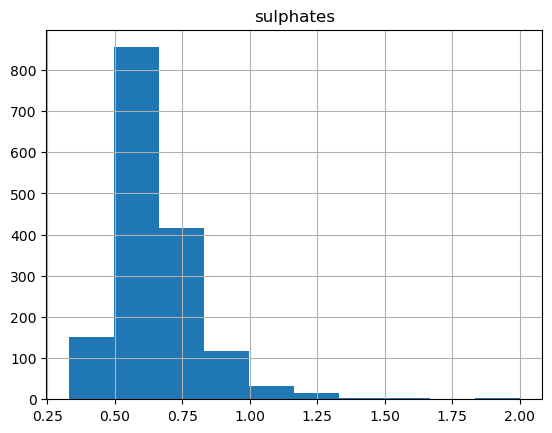

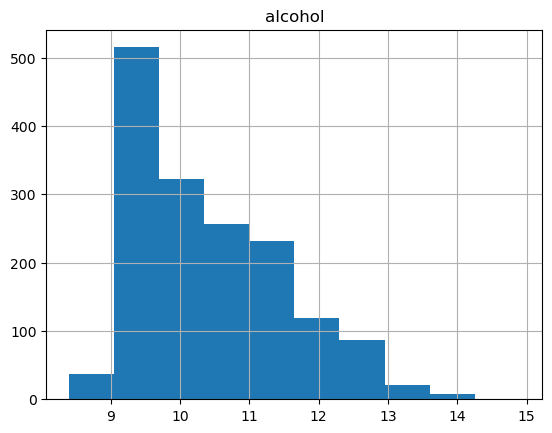

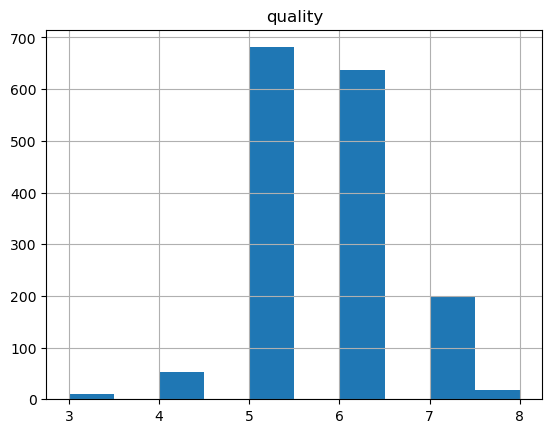

In [8]:
for column in wine_data:
    wine_data[column].hist()
    plt.title(column)
    plt.show()

**PLOTTING OF A HEATMAP**

<Axes: title={'center': 'Heatmap of the Wine Dataset'}>

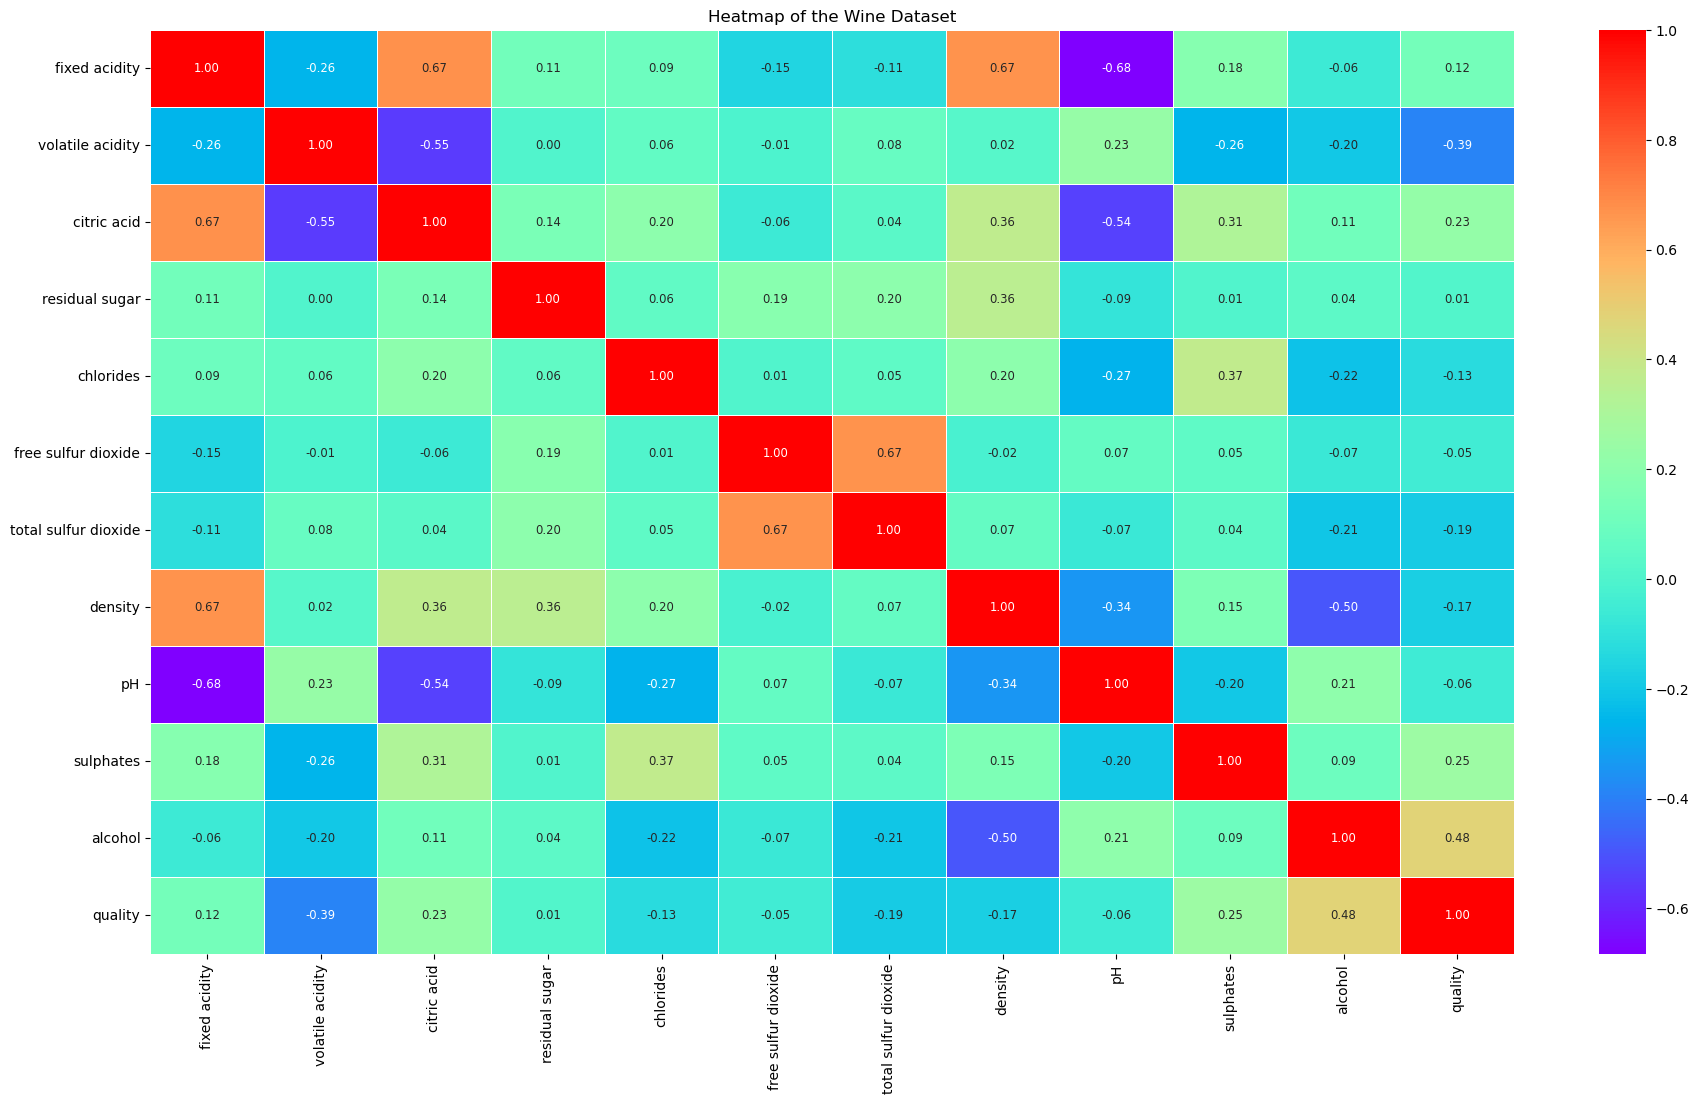

In [9]:
correlation_matrix= wine_data.corr()
fig,ax=plt.subplots(figsize=(22,12))
plt.title("Heatmap of the Wine Dataset")
sns.heatmap(correlation_matrix, cmap='rainbow', annot_kws={'size':'small'} ,linewidths='0.5', fmt=',.2f',annot=True)

**From the above heatmap we can see that alcohol has the highest correlation with our target variable i.e quality with a strong positive correlation of 0.48.**

**Volatile acidity also has strong negative correlation with alcohol with a negative correlation of -0.39 These 2 variables could prove crucial in our wine quality prediction**

**BARPLOTTING  ALCOHOL LEVELS AND THE WINE QUALITY**

<Axes: xlabel='quality', ylabel='alcohol'>

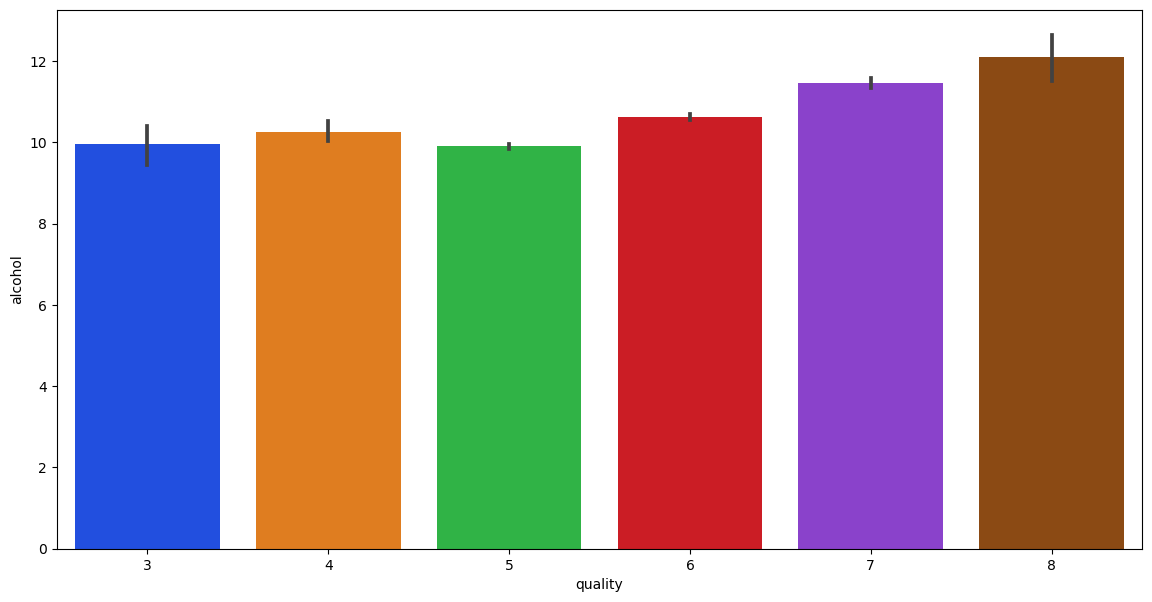

In [10]:
figure=plt.figure(figsize=(14,7))
sns.barplot(x=wine_data['quality'],y=wine_data['alcohol'], palette='bright')

**BARPLOTTING  THE ACIDITY LEVELS AND THE WINE QUALITY**

<Axes: xlabel='quality', ylabel='volatile acidity'>

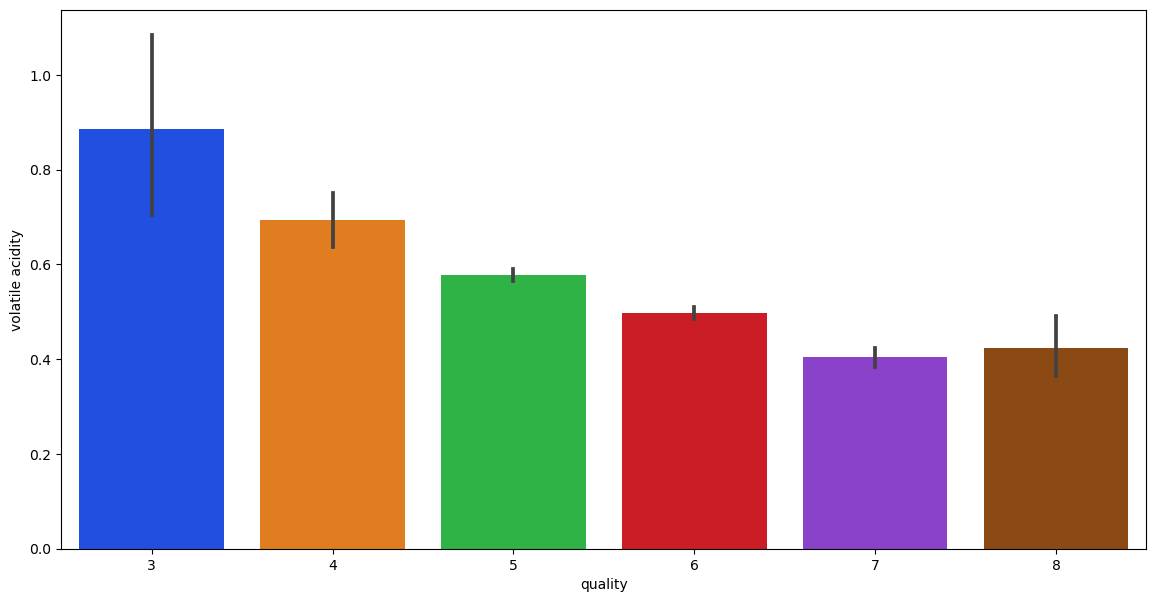

In [11]:
plt.figure(figsize=(14,7))
sns.barplot(x=wine_data['quality'],y=wine_data['volatile acidity'], palette='bright')

**Main take: Strong relatiosnhip between alcohol and quality. Strong negative correlation between volatile acidity and alcohol.**

**FINAL DATA PREPERATION BEFORE APPLYING MACHINE LEARNING**

"quality" is our target variable The X values are our features

In [12]:
#separating the features and label
X= wine_data.drop("quality", axis=1)

In [13]:
y = wine_data["quality"].apply(lambda y_value:1 if y_value>=6.5 else 0)

In [14]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Splitting X,y into training and testing data**

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=3) #

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


APPLYING MACHINE LEARNING

**The model A**

In [17]:
dtc1 = DecisionTreeClassifier()

In [18]:
#fitting and training the model
dtc1.fit(X_train, y_train)
#model evaluation
dtc_pred = dtc1.predict(X_test)
dtc_acc = accuracy_score(dtc_pred, y_test)
print("Test Accuracy score is:", dtc_acc*100)

Test Accuracy score is: 89.25


In [19]:
# cross-validation
score = cross_val_score(dtc1, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 80.54937304075234


**Hyperparameter Tuning**

In [20]:
dtc2= DecisionTreeClassifier(max_depth=5)
#fitting and training the model
dtc2.fit(X_train, y_train)
#model evaluation
dtc_pred = dtc2.predict(X_test)
dtc_acc = accuracy_score(dtc_pred, y_test)
print("Test Accuracy score is:", dtc_acc*100)

Test Accuracy score is: 92.75


In [21]:
# cross-validation
score = cross_val_score(dtc2, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 84.92829153605015


**There is a notable improvement after incoperation of the max_depth
hence dtc2 will be our Decision Tree Classifier**

**The model B**

In [22]:
from sklearn.naive_bayes import GaussianNB


In [23]:
gnb1 = GaussianNB()

In [24]:
# fitting and training the model
gnb1.fit(X_train, y_train)
gnb_pred = gnb1.predict(X_test)
#model evaluation
gnb_acc=accuracy_score(gnb_pred,y_test)
print(gnb_acc*100)

85.0


In [25]:
# cross-validation
score = cross_val_score(gnb1, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 80.67927115987462


**Hyperparameter Tuning**

In [26]:
gnb2 = GaussianNB(var_smoothing=.1)
gnb2.fit(X_train, y_train)
gnb_pred = gnb2.predict(X_test)
#model evaluation
gnb_acc=accuracy_score(gnb_pred,y_test)
print(gnb_acc*100)

85.75


In [27]:
score = cross_val_score(gnb2, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 86.4290752351097


**There is is notable improvement when incoperating smoothing so gnb2 will be our  Gaussian Naive Bayes classifier**


**dtc2 which has been tuned with max_depth of 5  has a test accuracy of 92.75% but a significantly lower cross validation accuracy  of 85%.**

**gnb2 which has been tuned with smOothing of 0.1 has a testing accuracy of 85.75% and a  solid cross validation accuracy of 86%.**

**Taking the above into consideration Naïve Bayes would be a better algorithm to deploy as its cross validation is higher than of the DecisionTreeClassifier and also taking into consideration  the difference beteen the test accuracy and its  cross validation accuracy which is just over 1% compared to that of the DecisionTreeClassifier which is around 4%.
gnb2 would be the model best fitting to be deployed amongst the 4 models**




**Saving the model**

In [29]:
import joblib

model_file_path = 'gaussian_naive_bayes_model.pkl'

joblib.dump(gnb2, model_file_path)

['gaussian_naive_bayes_model.pkl']